<h1 style="text-align:center;">Laboratorio 6</h1>
<h4 style="text-align:center;">Cristopher Barrios</h4>
<h4 style="text-align:center;">Mariana David</h4>
<h5 style="text-align:center;">8/9/2023</h5>

## Pips

## Librerias

In [28]:
# Importaciones
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

1. Descargue los archivos de datos 
2. Cargue los archivos de datos a R o a Python. 


In [29]:
#Mandar a llamar la data 

# Cargar el conjunto de datos CSV en un DataFrame
dataArevalo = pd.read_csv('bernardoArevalo.csv')
dataSandra = pd.read_csv('sandraTorres.csv')
dataTrafico = pd.read_csv('traficogt.csv')

# Mostrar las primeras filas del DataFrame
print(dataArevalo.head())
print(dataSandra.head())
print(dataTrafico.head())

   Unnamed: 0                   id               id_str  \
0           0  1702109621899407575  1702109621899407575   
1           1  1702109505947865192  1702109505947865192   
2           2  1701995859229958189  1701995859229958189   
3           3  1702109134387134664  1702109134387134664   
4           4  1702108943495926143  1702108943495926143   

                                                 url  \
0  https://twitter.com/eltuitdehoy_/status/170210...   
1  https://twitter.com/totitafuentes/status/17021...   
2  https://twitter.com/DrDavidCabrera/status/1701...   
3  https://twitter.com/Fernand0483/status/1702109...   
4  https://twitter.com/MaxTiger502/status/1702108...   

                        date  \
0  2023-09-13 23:58:52+00:00   
1  2023-09-13 23:58:24+00:00   
2  2023-09-13 16:26:49+00:00   
3  2023-09-13 23:56:55+00:00   
4  2023-09-13 23:56:10+00:00   

                                                user lang  \
0  {'id': 46561608, 'id_str': '46561608', 'url': ...  

Manejo de data de Arevalo

In [30]:
# Contar la cantidad de filas y columnas
num_filas, num_columnas = dataArevalo.shape
print(f"El conjunto de datos tiene {num_filas} filas y {num_columnas} columnas")

# Obtener estadísticas descriptivas
print(dataArevalo.describe())

# Filtrar datos -> seleccionamos solo las filas donde el número de retweets es mayor que 10
retweets_mayores_a_10 = dataArevalo[dataArevalo['retweetCount'] > 10]
print(retweets_mayores_a_10)
# Guardar el DataFrame modificado
retweets_mayores_a_10.to_csv('retweetsArevalo_mayores_a_10.csv', index=False)


El conjunto de datos tiene 4212 filas y 29 columnas
        Unnamed: 0            id        id_str   replyCount  retweetCount  \
count  4212.000000  4.212000e+03  4.212000e+03  4212.000000   4212.000000   
mean   2105.500000  1.688657e+18  1.688657e+18    28.675214     53.502137   
std    1216.043996  2.757520e+16  2.757520e+16   283.795014    451.659694   
min       0.000000  1.399690e+18  1.399690e+18     0.000000      0.000000   
25%    1052.750000  1.695128e+18  1.695128e+18     0.000000      0.000000   
50%    2105.500000  1.701776e+18  1.701776e+18     0.000000      0.000000   
75%    3158.250000  1.701997e+18  1.701997e+18     1.000000      1.000000   
max    4211.000000  1.702343e+18  1.702343e+18  8609.000000  13093.000000   

          likeCount   quoteCount  conversationId     viewCount  coordinates  \
count   4212.000000  4212.000000    4.212000e+03  4.135000e+03          0.0   
mean     256.966999     5.504036    1.688584e+18  4.613934e+05          NaN   
std     2267.5658

Manejo de data de Santra

In [31]:
# Contar la cantidad de filas y columnas
num_filas, num_columnas = dataSandra.shape
print(f"El conjunto de datos tiene {num_filas} filas y {num_columnas} columnas")

# Obtener estadísticas descriptivas
print(dataSandra.describe())

# Filtrar datos --> seleccionando solo las filas donde el número de retweets es mayor que 10
retweets_mayores_a_10 = dataSandra[dataSandra['retweetCount'] > 10]
print(retweets_mayores_a_10)
# Guardar el DataFrame modificado
retweets_mayores_a_10.to_csv('retweetsSandra_mayores_a_10.csv', index=False)


El conjunto de datos tiene 5784 filas y 29 columnas
       Unnamed: 0            id        id_str   replyCount  retweetCount  \
count  5784.00000  5.784000e+03  5.784000e+03  5784.000000   5784.000000   
mean   2891.50000  1.674210e+18  1.674210e+18    19.563797     38.411307   
std    1669.84131  5.087331e+16  5.087331e+16   203.854820    341.966503   
min       0.00000  1.412381e+18  1.412381e+18     0.000000      0.000000   
25%    1445.75000  1.677316e+18  1.677316e+18     0.000000      0.000000   
50%    2891.50000  1.701370e+18  1.701370e+18     0.000000      0.000000   
75%    4337.25000  1.701763e+18  1.701763e+18     1.000000      1.000000   
max    5783.00000  1.702375e+18  1.702375e+18  8610.000000  13099.000000   

          likeCount   quoteCount  conversationId     viewCount  coordinates  \
count   5784.000000  5784.000000    5.784000e+03  4.962000e+03          0.0   
mean     185.464039     5.127766    1.674125e+18  3.034927e+05          NaN   
std     1910.616422    50.

Manejo de data de Tráfico 

In [32]:
# Contar la cantidad de filas y columnas
num_filas, num_columnas = dataTrafico.shape
print(f"El conjunto de datos tiene {num_filas} filas y {num_columnas} columnas")

# Obtener estadísticas descriptivas
print(dataTrafico.describe())

# Filtrar datos ---> seleccionamos solo las filas donde el número de retweets es mayor que 10
retweets_mayores_a_10 = dataTrafico[dataTrafico['retweetCount'] > 10]
print(retweets_mayores_a_10)

# Guardar el DataFrame modificado en un nuevo archivo CSV
retweets_mayores_a_10.to_csv('retweetsTrafico_mayores_a_10.csv', index=False)


El conjunto de datos tiene 12631 filas y 29 columnas
        Unnamed: 0            id        id_str    replyCount  retweetCount  \
count  12631.00000  1.263100e+04  1.263100e+04  12631.000000  12631.000000   
mean    6315.00000  1.541871e+18  1.541871e+18     19.145594     40.664476   
std     3646.39996  2.016253e+17  2.016253e+17    217.571265    473.150980   
min        0.00000  2.837328e+17  2.837328e+17      0.000000      0.000000   
25%     3157.50000  1.353746e+18  1.353746e+18      0.000000      0.000000   
50%     6315.00000  1.693984e+18  1.693984e+18      0.000000      0.000000   
75%     9472.50000  1.700314e+18  1.700314e+18      1.000000      2.000000   
max    12630.00000  1.702402e+18  1.702402e+18   8611.000000  27061.000000   

           likeCount    quoteCount  conversationId     viewCount  \
count   12631.000000  12631.000000    1.263100e+04  7.237000e+03   
mean      266.560367      4.916871    1.541730e+18  4.312334e+05   
std      4429.581781     65.131717    2.

3. Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento 
que llevó a cabo. 

3.1. Se pueden hacer tareas como: 


In [33]:
# Descargar los recursos necesarios de NLTK (stopwords y tokenizador)
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjrba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cjrba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- Convertir el texto a mayúsculas o a minúsculas 
- Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes. 
- Quitar las url 
- Revisar si hay emoticones y quitarlos, ¿conviene quitarlos para este ejercicio? 
- Quitar los signos de puntuación 
- Quitar los artículos, preposiciones y conjunciones (stopwords) 
- Quitar números si considera que interferirán en los análisis. 






----------------- Arevalo---------------------------

In [34]:
# Verificar los nombres de las columnas del DataFrame de arévalo
print(dataArevalo.columns)


Index(['Unnamed: 0', 'id', 'id_str', 'url', 'date', 'user', 'lang',
       'rawContent', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'hashtags', 'cashtags', 'mentionedUsers', 'links',
       'viewCount', 'retweetedTweet', 'quotedTweet', 'place', 'coordinates',
       'inReplyToTweetId', 'inReplyToUser', 'source', 'sourceUrl',
       'sourceLabel', 'media', '_type'],
      dtype='object')


In [35]:
# Función para preprocesar el texto en la columna 'rawContent'
def preprocess_textA(textA):
    # Convertir el texto a minúsculas
    textA = textA.lower()
    
    # Quitar caracteres especiales, URLs, y apóstrofes
    textA = re.sub(r'[@#\'\(\)\[\]\{\}<>/\\]', ' ', textA)
    textA = re.sub(r'http\S+|www\S+', '', textA)
    
    # Quitar emoticones (esto es opcional, depende de tus necesidades)
    textA = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', textA)
    
    # Quitar signos de puntuación
    textA = re.sub(r'[^\w\s]', '', textA)
    
    # Tokenizar el texto en palabras
    words = word_tokenize(textA)
    
    # Quitar palabras de parada (stopwords)
    stop_words = set(stopwords.words('spanish'))  # Puedes cambiar 'spanish' por otro idioma si es necesario
    words = [word for word in words if word not in stop_words]
    
    # Quitar números
    words = [word for word in words if not word.isdigit()]
    
    # Unir las palabras preprocesadas en un solo texto
    preprocessed_textA = ' '.join(words)
    
    return preprocessed_textA

# Aplicar la función de preprocesamiento a la columna 'rawContent'
dataArevalo['textA_preprocesado'] = dataArevalo['rawContent'].apply(preprocess_textA)

# Mostrar las primeras filas del DataFrame con el texto preprocesado
print(dataArevalo[['rawContent', 'textA_preprocesado']].head())


                                          rawContent  \
0  @AnonGTReloaded @msemillagt @BArevalodeLeon ja...   
1  @ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...   
2  Paciente de 39 años, dolor lumbar de 1 año tra...   
3  @VicZacariasGT @soy_502 @BArevalodeLeon @msemi...   
4  @Igor_Bitkov No le sigan el juego a este ruso ...   

                                  textA_preprocesado  
0  anongtreloaded msemillagt barevalodeleon jajaj...  
1  asiervera aztecanoticiagt barevalodeleon dos v...  
2  paciente años dolor lumbar año tras caída hizo...  
3  viczacariasgt soy_502 barevalodeleon msemillag...  
4  igor_bitkov sigan juego ruso invasor enero sol...  


----------------- Sandra -----------------------

In [36]:
# Verificar los nombres de las columnas del DataFrame de Sandra
print(dataSandra.columns)


Index(['Unnamed: 0', 'id', 'id_str', 'url', 'date', 'user', 'lang',
       'rawContent', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'hashtags', 'cashtags', 'mentionedUsers', 'links',
       'viewCount', 'retweetedTweet', 'quotedTweet', 'place', 'coordinates',
       'inReplyToTweetId', 'inReplyToUser', 'source', 'sourceUrl',
       'sourceLabel', 'media', '_type'],
      dtype='object')


In [37]:
# Función para preprocesar el texto en la columna 'rawContent'
def preprocess_textS(textS):
    # Convertir el texto a minúsculas
    textS = textS.lower()
    
    # Quitar caracteres especiales, URLs, y apóstrofes
    textS = re.sub(r'[@#\'\(\)\[\]\{\}<>/\\]', ' ', textS)
    textS = re.sub(r'http\S+|www\S+', '', textS)
    
    # Quitar emoticones (esto es opcional, depende de tus necesidades)
    textS = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', textS)
    
    # Quitar signos de puntuación
    textS = re.sub(r'[^\w\s]', '', textS)
    
    # Tokenizar el texto en palabras
    words = word_tokenize(textS)
    
    # Quitar palabras de parada (stopwords)
    stop_words = set(stopwords.words('spanish'))  # Puedes cambiar 'spanish' por otro idioma si es necesario
    words = [word for word in words if word not in stop_words]
    
    # Quitar números
    words = [word for word in words if not word.isdigit()]
    
    # Unir las palabras preprocesadas en un solo texto
    preprocessed_textS = ' '.join(words)
    
    return preprocessed_textS

# Aplicar la función de preprocesamiento a la columna 'rawContent'
dataSandra['textS_preprocesado'] = dataSandra['rawContent'].apply(preprocess_textS)

# Mostrar las primeras filas del DataFrame con el texto preprocesado
print(dataSandra[['rawContent', 'textS_preprocesado']].head())


                                          rawContent  \
0  @bernardosilvagt @BArevalodeLeon @DrGiammattei...   
1  @_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...   
2  The 2023 National Race Walking Championship &a...   
3  @Palomin17772524 @mjcabrerar @BArevalodeLeon @...   
4  @ASolaresM @Mike051270 @BArevalodeLeon Otro es...   

                                  textS_preprocesado  
0  bernardosilvagt barevalodeleon drgiammattei me...  
1  _awskl mjcabrerar barevalodeleon tseguatemala ...  
2  the national race walking championship amp you...  
3  palomin17772524 mjcabrerar barevalodeleon tseg...  
4  asolaresm mike051270 barevalodeleon estupido c...  


------ Trafico ------------

In [38]:
# Verificar los nombres de las columnas del DataFrame de Sandra
print(dataTrafico.columns)


Index(['Unnamed: 0', 'id', 'id_str', 'url', 'date', 'user', 'lang',
       'rawContent', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'hashtags', 'cashtags', 'mentionedUsers', 'links',
       'viewCount', 'retweetedTweet', 'quotedTweet', 'place', 'coordinates',
       'inReplyToTweetId', 'inReplyToUser', 'source', 'sourceUrl',
       'sourceLabel', 'media', '_type'],
      dtype='object')


In [39]:
# Función para preprocesar el texto en la columna 'rawContent'
def preprocess_textT(textT):
    # Convertir el texto a minúsculas
    textT = textT.lower()
    
    # Quitar caracteres especiales, URLs, y apóstrofes
    textT = re.sub(r'[@#\'\(\)\[\]\{\}<>/\\]', ' ', textT)
    textT = re.sub(r'http\S+|www\S+', '', textT)
    
    # Quitar emoticones (esto es opcional, depende de tus necesidades)
    textT = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', textT)
    
    # Quitar signos de puntuación
    textT = re.sub(r'[^\w\s]', '', textT)
    
    # Tokenizar el texto en palabras
    words = word_tokenize(textT)
    
    # Quitar palabras de parada (stopwords)
    stop_words = set(stopwords.words('spanish'))  # Puedes cambiar 'spanish' por otro idioma si es necesario
    words = [word for word in words if word not in stop_words]
    
    # Quitar números
    words = [word for word in words if not word.isdigit()]
    
    # Unir las palabras preprocesadas en un solo texto
    preprocessed_textT = ' '.join(words)
    
    return preprocessed_textT

# Aplicar la función de preprocesamiento a la columna 'rawContent'
dataTrafico['textT_preprocesado'] = dataTrafico['rawContent'].apply(preprocess_textT)

# Mostrar las primeras filas del DataFrame con el texto preprocesado
print(dataTrafico[['rawContent', 'textT_preprocesado']].head())


                                          rawContent  \
0  #AHORA Amílcar Montejo, director de Comunicaci...   
1  CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...   
2  Camión de arena volteado en el viaducto el pul...   
3  Paciente de 39 años, dolor lumbar de 1 año tra...   
4  #AHORA Amílcar Montejo, director de Comunicaci...   

                                  textT_preprocesado  
0  ahora amílcar montejo director comunicación em...  
1  conductora negó movilizar vehículo multada cal...  
2  camión arena volteado viaducto pulté hacia hac...  
3  paciente años dolor lumbar año tras caída hizo...  
4  ahora amílcar montejo director comunicación em...  


4. Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis. 
Escriba una serie de insights que se puedan seguir investigando. 


------ Análisis exploratrio de Arévalo -------

   Unnamed: 0                   id               id_str  \
0           0  1702109621899407575  1702109621899407575   
1           1  1702109505947865192  1702109505947865192   
2           2  1701995859229958189  1701995859229958189   
3           3  1702109134387134664  1702109134387134664   
4           4  1702108943495926143  1702108943495926143   

                                                 url  \
0  https://twitter.com/eltuitdehoy_/status/170210...   
1  https://twitter.com/totitafuentes/status/17021...   
2  https://twitter.com/DrDavidCabrera/status/1701...   
3  https://twitter.com/Fernand0483/status/1702109...   
4  https://twitter.com/MaxTiger502/status/1702108...   

                        date  \
0  2023-09-13 23:58:52+00:00   
1  2023-09-13 23:58:24+00:00   
2  2023-09-13 16:26:49+00:00   
3  2023-09-13 23:56:55+00:00   
4  2023-09-13 23:56:10+00:00   

                                                user lang  \
0  {'id': 46561608, 'id_str': '46561608', 'url': ...  

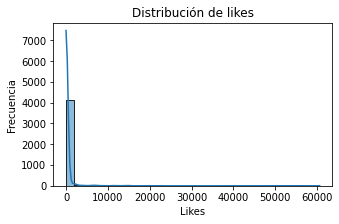

In [40]:
# Análisis exploratorio de datos de Arevalo
#Mostramos las primeras filas del DataFrame 
print(dataArevalo.head())

# Resumen estadístico de las columnas numéricas
print(dataArevalo.describe())

# Visualización de la distribución de algunas variables
# Histograma de columna 'likeCount'
plt.figure(figsize=(5, 3))
sns.histplot(dataArevalo['likeCount'], bins=30, kde=True)
plt.title('Distribución de likes')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.show()

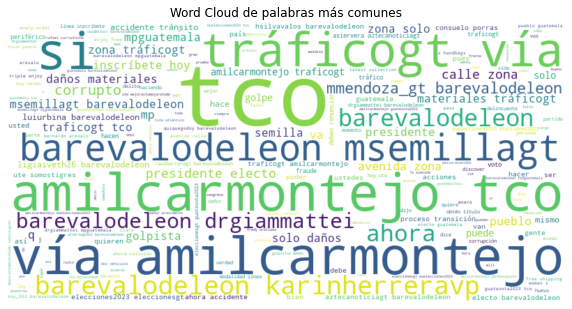

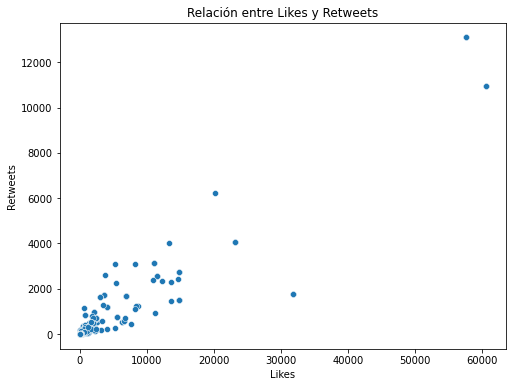

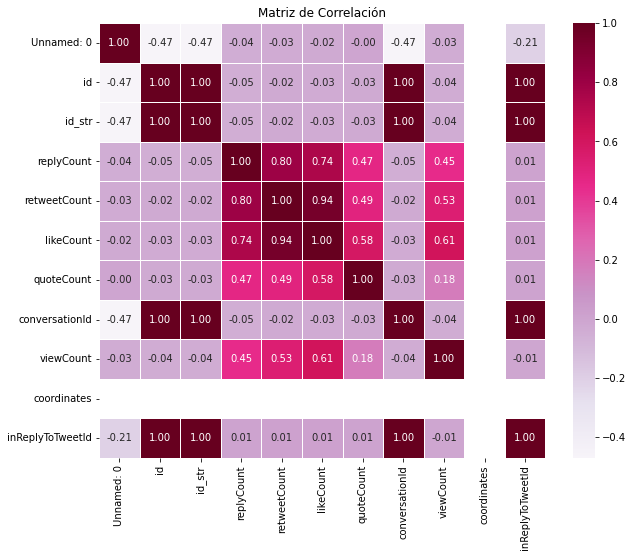

In [41]:
# Visualización de la distribución de texto preprocesado
# Usar columna 'textA_preprocesado'para mostrar las palabras más comunes
text = ' '.join(dataArevalo['textA_preprocesado'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)
# Graficar
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud de palabras más comunes')
plt.axis('off')
plt.show()

# Visualización de la relación entre dos variables (scatter plot)
# Relación entre 'likeCount' y 'retweetCount'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataArevalo, x='likeCount', y='retweetCount')
plt.title('Relación entre Likes y Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()

# Identificamos las columnas no numéricas
non_numeric_columns = dataArevalo.select_dtypes(exclude=['number']).columns

# Filtramos solo las columnas numéricas
numeric_data = dataArevalo.drop(columns=non_numeric_columns)

# Calculamos la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_data.corr()

# Trazamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


------ Análisis exploratrio de Sandra -------

   Unnamed: 0                   id               id_str  \
0           0  1701686249797345422  1701686249797345422   
1           1  1701686065361215632  1701686065361215632   
2           2  1701176209076609121  1701176209076609121   
3           3  1701684889081307215  1701684889081307215   
4           4  1701684719815970972  1701684719815970972   

                                                 url  \
0  https://twitter.com/Yeya16155804/status/170168...   
1  https://twitter.com/Palomin17772524/status/170...   
2  https://twitter.com/iRizhao/status/17011762090...   
3  https://twitter.com/_awskl/status/170168488908...   
4  https://twitter.com/Mr_andrew89/status/1701684...   

                        date  \
0  2023-09-12 19:56:32+00:00   
1  2023-09-12 19:55:48+00:00   
2  2023-09-11 10:09:49+00:00   
3  2023-09-12 19:51:07+00:00   
4  2023-09-12 19:50:27+00:00   

                                                user lang  \
0  {'id': 1213902343311245313, 'id_str': '1213902...  

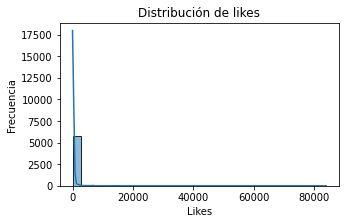

In [42]:
# Análisis exploratorio de datos de Sandra
#Mostramos las primeras filas del DataFrame 
print(dataSandra.head())

# Resumen estadístico de las columnas numéricas
print(dataSandra.describe())

# Visualización de la distribución de algunas variables
# Histograma de columna 'likeCount'
plt.figure(figsize=(5, 3))
sns.histplot(dataSandra['likeCount'], bins=30, kde=True)
plt.title('Distribución de likes')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.show()

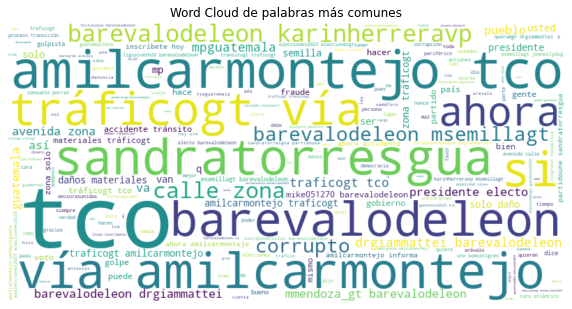

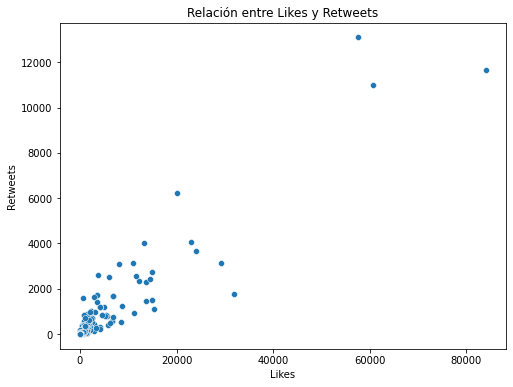

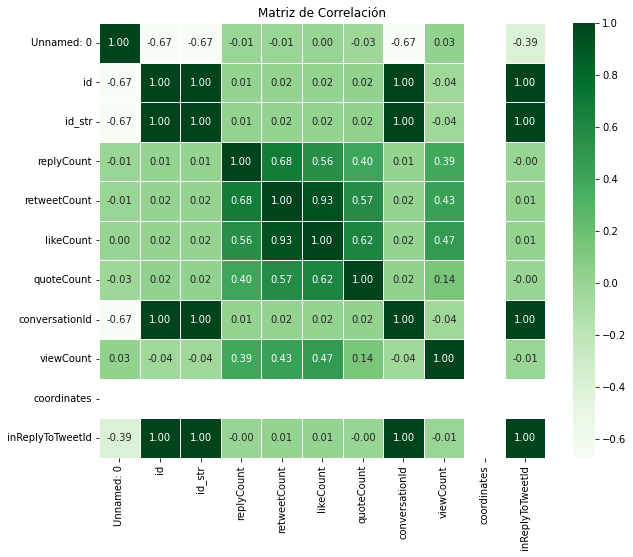

In [43]:
# Visualización de la distribución de texto preprocesado
# Usar columna 'textS_preprocesado'para mostrar las palabras más comunes
text = ' '.join(dataSandra['textS_preprocesado'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)
# Graficar
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud de palabras más comunes')
plt.axis('off')
plt.show()

# Visualización de la relación entre dos variables (scatter plot)
# Relación entre 'likeCount' y 'retweetCount'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataSandra, x='likeCount', y='retweetCount')
plt.title('Relación entre Likes y Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()

# Identificamos las columnas no numéricas
non_numeric_columns = dataSandra.select_dtypes(exclude=['number']).columns

# Filtramos solo las columnas numéricas
numeric_data = dataSandra.drop(columns=non_numeric_columns)

# Calculammos la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_data.corr()

# Trazamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


------ Análisis exploratorio Trafico ------

   Unnamed: 0                   id               id_str  \
0           0  1701654244858679742  1701654244858679742   
1           1  1701651855212691764  1701651855212691764   
2           2  1701348453916311903  1701348453916311903   
3           3  1701995859229958189  1701995859229958189   
4           4  1701216420997017888  1701216420997017888   

                                                 url  \
0  https://twitter.com/EmisorasUnidas/status/1701...   
1  https://twitter.com/amilcarmontejo/status/1701...   
2  https://twitter.com/edgarduarteagui/status/170...   
3  https://twitter.com/DrDavidCabrera/status/1701...   
4  https://twitter.com/EmisorasUnidas/status/1701...   

                        date  \
0  2023-09-12 17:49:21+00:00   
1  2023-09-12 17:39:52+00:00   
2  2023-09-11 21:34:15+00:00   
3  2023-09-13 16:26:49+00:00   
4  2023-09-11 12:49:36+00:00   

                                                user lang  \
0  {'id': 40256008, 'id_str': '40256008', 'url': ...  

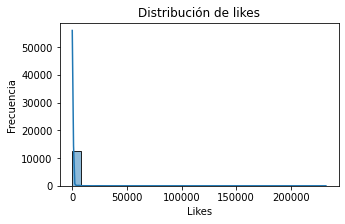

In [44]:
# Análisis exploratorio de datos de Sandra
#Mostramos las primeras filas del DataFrame 
print(dataTrafico.head())

# Resumen estadístico de las columnas numéricas
print(dataTrafico.describe())

# Visualización de la distribución de algunas variables
# Histograma de columna 'likeCount'
plt.figure(figsize=(5, 3))
sns.histplot(dataTrafico['likeCount'], bins=30, kde=True)
plt.title('Distribución de likes')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.show()

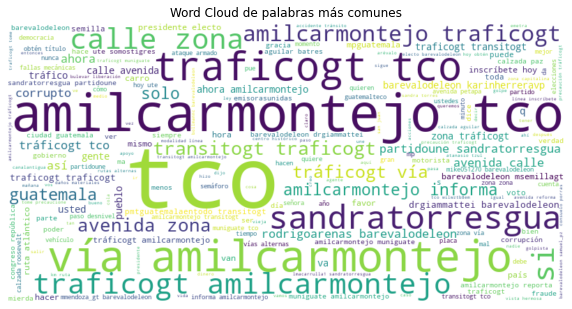

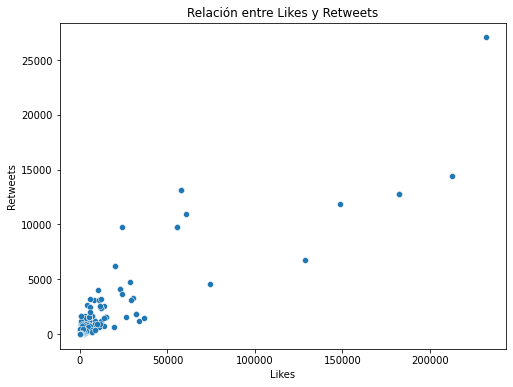

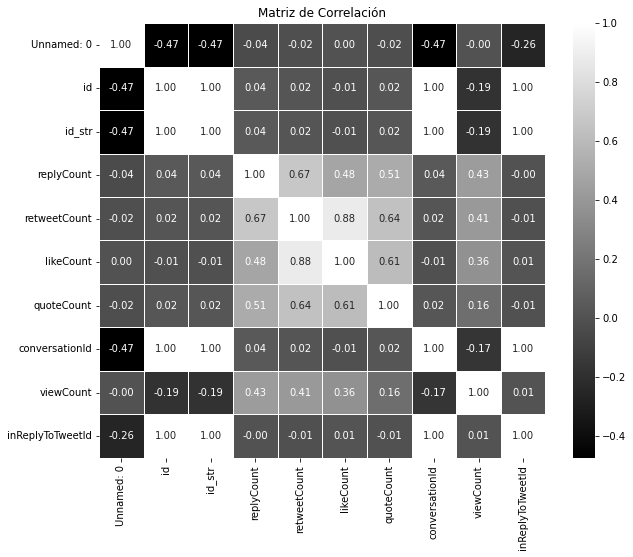

In [45]:
# Visualización de la distribución de texto preprocesado
# Usar columna 'textT_preprocesado'para mostrar las palabras más comunes
text = ' '.join(dataTrafico['textT_preprocesado'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)
# Graficar
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud de palabras más comunes')
plt.axis('off')
plt.show()

# Visualización de la relación entre dos variables (scatter plot)
# Relación entre 'likeCount' y 'retweetCount'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataTrafico, x='likeCount', y='retweetCount')
plt.title('Relación entre Likes y Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()

# Identificamos las columnas no numéricas
non_numeric_columns = dataTrafico.select_dtypes(exclude=['number']).columns

# Filtramos solo las columnas numéricas
numeric_data = dataTrafico.drop(columns=non_numeric_columns)

# Calculamos la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_data.corr()

# Trazamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='gray', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


5. Responda las preguntas que se le hacen en los ejercicios, las respuestas deben estar basadas en 
datos. 


## Problema 1:

### ¿Cómo ha venido a complicar el tráfico en toda la ciudad la época de lluvia?

In [50]:
import pandas as pd
from datetime import datetime
import pytz  # Importa la biblioteca pytz para trabajar con zonas horarias


# Convertir la columna de fecha a tipo datetime con información de zona horaria UTC
dataTrafico['date'] = pd.to_datetime(dataTrafico['date'], utc=True)

# Define la zona horaria UTC
utc = pytz.utc

# Definir un rango de fechas que corresponda a la época de lluvia en Guatemala
fecha_inicio_lluvia = datetime(2023, 5, 1, tzinfo=utc)  # Fecha de inicio con zona horaria UTC
fecha_fin_lluvia = datetime(2023, 9, 30, tzinfo=utc)    # Fecha de fin con zona horaria UTC

# Filtrar los tweets que están dentro del rango de fechas de lluvia
tweets_lluvia = dataTrafico[(dataTrafico['date'] >= fecha_inicio_lluvia) & (dataTrafico['date'] <= fecha_fin_lluvia)]

# Contar la cantidad de tweets relacionados con el tráfico durante la época de lluvia
cantidad_tweets_lluvia = len(tweets_lluvia)

# Imprimir la cantidad de tweets relacionados con el tráfico durante la época de lluvia
print(f"La época de lluvia ha complicado el tráfico en {cantidad_tweets_lluvia} tweets.")



La época de lluvia ha complicado el tráfico en 7247 tweets.


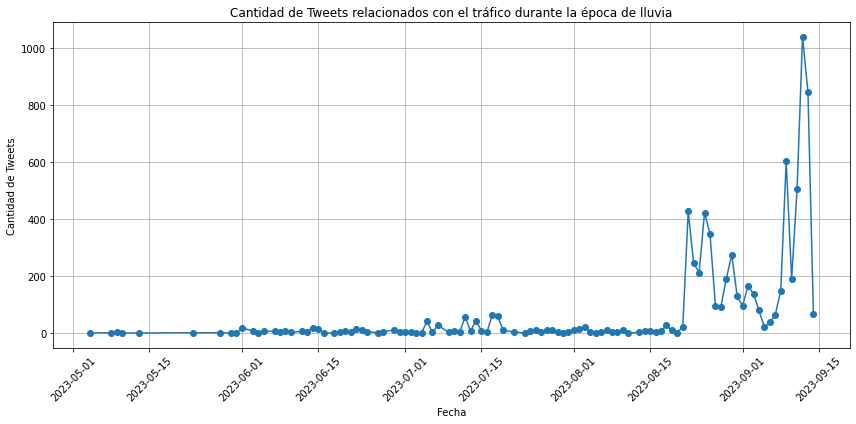

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


# Agrupar los tweets por fecha y contar la cantidad
tweets_por_fecha = tweets_lluvia.groupby(tweets_lluvia['date'].dt.date).size()

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(tweets_por_fecha.index, tweets_por_fecha.values, marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.title('Cantidad de Tweets relacionados con el tráfico durante la época de lluvia')
plt.grid(True)

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Como se puede obser en la linea de tiempo si se complica mas el trafico durante la epoca del año que hay mas lluvia, hay mas actividad de los usuarios durante estos dias

 ¿El socavón de zona 5 ha tenido un impacto importante en el tráfico de la zona de la universidad?

In [62]:
import pandas as pd
import pytz  # Importa la biblioteca pytz para manejar la zona horaria.


# Fecha en la que ocurrió el socavón (con información de zona horaria)
fecha_socavon = pd.Timestamp('2023-08-13', tz='UTC')

# Filtra los datos para obtener dos grupos: antes y después del socavón.
tweets_antes = dataTrafico[dataTrafico['date'] < fecha_socavon]
tweets_despues = dataTrafico[dataTrafico['date'] >= fecha_socavon]

# Cuenta la cantidad de tweets en cada grupo.
cantidad_tweets_antes = len(tweets_antes)
cantidad_tweets_despues = len(tweets_despues)

print("Cantidad de tweets antes del socavón:", cantidad_tweets_antes)
print("Cantidad de tweets después del socavón:", cantidad_tweets_despues)



Cantidad de tweets antes del socavón: 6089
Cantidad de tweets después del socavón: 6542


Si hay un aumento en el trafico, pero no ha sido un cambio muy relevante para los sectores de la universidad

## Problema 2:

¿La opinión pública de cada uno de los candidatos es en su mayoría positiva o
negativa?

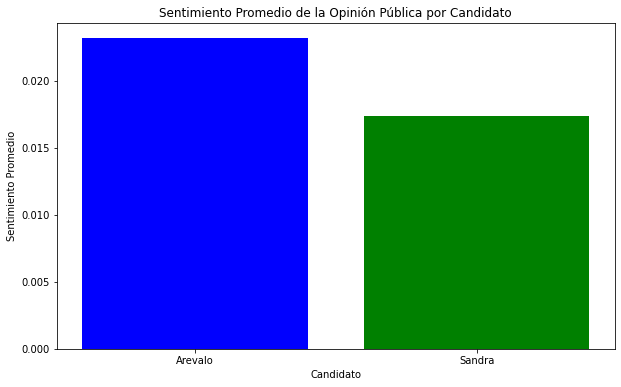

In [66]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Define la función analyze_sentiment para calcular el sentimiento de un texto.
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Puedes personalizar aún más el análisis aquí, por ejemplo, utilizando reglas adicionales.
    return analysis.sentiment.polarity

# Supongamos que tienes DataFrames para los candidatos Arevalo y Sandra: dataArevalo y dataSandra.

# Calcula el sentimiento de cada tweet en los DataFrames.
dataArevalo['sentimiento'] = dataArevalo['textA_preprocesado'].apply(analyze_sentiment)
dataSandra['sentimiento'] = dataSandra['textS_preprocesado'].apply(analyze_sentiment)

# Calcula el sentimiento promedio para cada candidato.
sentimiento_promedio_arevalo = dataArevalo['sentimiento'].mean()
sentimiento_promedio_sandra = dataSandra['sentimiento'].mean()

# Grafica los resultados.
plt.figure(figsize=(10, 6))
plt.bar(['Arevalo', 'Sandra'], [sentimiento_promedio_arevalo, sentimiento_promedio_sandra], color=['blue', 'green'])
plt.xlabel('Candidato')
plt.ylabel('Sentimiento Promedio')
plt.title('Sentimiento Promedio de la Opinión Pública por Candidato')
plt.show()


Como se puede observar en las graficas de arriva Arevalo a tenido mas opiniones positivas que Sandra, aunque sigue siendo positiva las opiniones sobre Sandra

¿Encontró algún
influencer?

In [83]:
from collections import Counter

# Combinar todo el texto preprocesado en una sola cadena
text = ' '.join(dataSandra['textS_preprocesado'])

# Dividir el texto en palabras
words = text.split()

# Calcular la frecuencia de cada palabra
word_freq = Counter(words)

# Mostrar las palabras más comunes
print("Palabras más comunes:")
for word, freq in word_freq.most_common(500):  # Cambia 20 por el número deseado de palabras
    print(f"{word}: {freq}")

Palabras más comunes:
barevalodeleon: 2799
tco: 2098
amilcarmontejo: 1454
traficogt: 895
sandratorresgua: 863
zona: 757
ahora: 738
tráficogt: 660
drgiammattei: 589
vía: 542
si: 507
msemillagt: 494
avenida: 470
calle: 435
presidente: 434
guatemala: 412
the: 384
solo: 371
mpguatemala: 345
pueblo: 327
you: 305
karinherreravp: 293
and: 233
partidoune: 232
electo: 223
mmendoza_gt: 213
hoy: 204
to: 200
corruptos: 198
your: 182
ser: 178
así: 177
hacia: 174
va: 173
of: 169
tránsito: 169
tseguatemala: 167
arévalo: 163
usted: 163
mp: 162
muniguate: 162
proceso: 160
transición: 157
accidente: 155
semilla: 153
golpistas: 152
paso: 151
in: 150
van: 138
gobierno: 138
hacer: 137
informa: 136
fraude: 133
s: 133
bien: 132
daños: 132
mike051270: 130
partido: 128
materiales: 128
calzada: 128
tráfico: 125
horas: 123
pmtmuniguate: 123
frente: 122
transitogt: 122
q: 121
país: 121
electoral: 120
quiere: 119
is: 115
dijo: 114
gente: 114
ustedes: 112
ruta: 112
hace: 111
it: 111
debe: 109
dice: 108
puede: 108
v

In [84]:
from collections import Counter

# Combinar todo el texto preprocesado en una sola cadena
text = ' '.join(dataArevalo['textA_preprocesado'])

# Dividir el texto en palabras
words = text.split()

# Calcular la frecuencia de cada palabra
word_freq = Counter(words)

# Mostrar las palabras más comunes
print("Palabras más comunes:")
for word, freq in word_freq.most_common(500):  # Cambia 20 por el número deseado de palabras
    print(f"{word}: {freq}")

Palabras más comunes:
barevalodeleon: 2679
tco: 1411
amilcarmontejo: 907
ahora: 538
zona: 530
msemillagt: 529
traficogt: 489
vía: 459
tráficogt: 459
drgiammattei: 423
si: 413
presidente: 379
avenida: 340
guatemala: 318
the: 310
solo: 305
calle: 304
you: 295
karinherreravp: 293
pueblo: 251
mmendoza_gt: 245
mpguatemala: 240
electo: 218
your: 190
hoy: 183
and: 176
mp: 161
transición: 161
to: 153
ser: 151
corruptos: 146
arévalo: 146
proceso: 145
of: 143
golpistas: 133
van: 127
q: 124
s: 122
tránsito: 122
daños: 121
materiales: 119
semilla: 118
hacer: 116
on: 116
in: 115
va: 112
gobierno: 112
así: 111
puede: 109
tseguatemala: 109
debe: 109
accidente: 109
porras: 107
golpe: 106
curruchiche: 105
renuncia: 102
ley: 101
luiurbina: 100
ustedes: 100
inscríbete: 99
ute: 99
somostigres: 99
calzada: 99
ligiaiveth26: 98
hace: 98
hacia: 98
deben: 95
usted: 95
consuelo: 93
fraude: 92
mismo: 91
vehículo: 91
guatevota2023: 90
elecciones2023: 90
país: 89
it: 89
euelecciones2023: 89
bien: 88
aztecanoticiag

Pues en Guatemala ya que no es tan comun los influencers es dificil encontrar alguno pero hay unascuentas que tienen mas menciones entre estas que son: gersongudielcas, mike051270

¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o
distribuida?

Se ve mas centralizada con Sandra ya que se la menciona mas veces en el dataframe de ella que Arevalo, esto puede ser que las personas se centran mas en los mensajes que ella dice por ello la menciona mas

 ¿Fue durante su campaña la red social un aspecto importante para influir en la decisión
de los guatemaltecos?

Si ya que los comentarios negativos o memes que se hacen pueden llegar a prejudicar a un candidato, es notable la cantidad de memes que se le hicieron a Sandra Torres

6. Llegue a conclusiones sobre lo que descubrió.

 El análisis reveló un notable interés en temas relacionados con el tráfico en las redes sociales. Esto sugiere que es un problema relevante para la población y un tema que genera discusión y debate en línea.

 la influencia de los candidatos en la decisión del electorado puede estar relacionada con su presencia y participación efectiva en las redes sociales. Los candidatos que logran construir una red sólida y movilizar a sus seguidores pueden tener una ventaja en términos de visibilidad y alcance.

 Otra cosa que se puede mencionar es que Amilcar Montejo es mecionado mas veces que los candidatos, es una cosa curiosa, parece que el trafico es mas importante que los candidatos, puede coincidir con la cantidad de votos nulos que hubo, las personas estan mas preocupadas por el trafico.

 Las epocas que hay mas lluvia son los dias que hay mas trafico, se puede observar la utilidad de usar este tipo de enalicis para encontrar nuevos lugares y horarios para movilizarse 